# 1.  True or False? (10 pts)

Please respond to the following questions within this markdown block. In some cases, you may want to run Python code to guide your response. 

1. Eigenvector/eigenvalue decomposition can only be performed for a square matrix. <span style='color:green'>True.<span style>
  
  
2. The number of parameters in a parametric model varies with the size of the training data. <span style='color:red'>False.<span style>
  
  
3. The covariance matrix is symmetric. <span style='color:green'>True.<span style>
  
  
4. The eigenvectors of any matrix are orthogonal. <span style='color:red'>False.<span style>
  
  
5. The eigenvectors of a symmetric matrix are always orthogonal. <span style='color:green'>True.<span style>
  
  
6. The directions of the principal components of a matrix $\underline{\underline{X}}$ are provided by the eigenvectors of the covariance matrix of $\underline{\underline{X}}$, i.e., cov($\underline{\underline{X}}$). <span style='color:green'>True.<span style>

  
7. The largest eigenvalue of cov($\underline{\underline{X}}$) will be associated with the first principal component of $\underline{\underline{X}}$ (i.e., the axis that captures the most variation in the data when the data are projected into it). <span style='color:green'>True.<span style>
  
  
8. If a matrix $\underline{\underline{X}}$ is multiplied by a matrix of its eigenvectors to produce a new matrix $\underline{\underline{X}}_{PCA}$, the covariance matrix of $\underline{\underline{X}}_{PCA}$ will be a diagonal matrix, the entries of which are the eigenvalues of $\underline{\underline{X}}$. <span style='color:green'>True, if it is a valid covariance matrix...<span style>
  
  
9. Non-parametric models do not contain parameters. <span style='color:green'>True.<span style>
  
  
10. The principal components of a matrix $\underline{\underline{X}}$ are guaranteed to form a better basis for linear regression than the original features of $\underline{\underline{X}}$. <span style='color:red'>False.<span style>

# 2. $NO_x$ Absorption Part I (35 points)

NO and NO$_2$, collectively known as NO$_x$, are harmful pollutants that are generated by combustion processes that use air as an oxidant.  They lead to respiratory inflamation and, through photochemical reactions, generate smog.  One set of technologies being developed to mitigate NO$_x$ emissions are Passive NO$_x$ Adsorbers (PNA). These materials adsorb NO$_x$ and then later release it to a catalyst that converts it to N$_2$ and H$_2$O.  Understanding where and how NO$_x$ adsorbs on these materials is an important step towards their improvement.

The data below was collected in a diffuse reflectance infrared fourier transform spectroscopy (DRIFTS) experiment by Kevin Gu from the Epling Lab.  A PNA was exposed to 200 ppm of NO$_x$ and concurrently DRIFTS spectra were collected. IR features in the 1780-1920 cm$^{-1}$ range are representative of N-O vibrational stretches.  In the exercises that follow we will fit the data with a number of different models and basis functions.

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('NO_on_Pd-BEA.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

Text(0, 0.5, 'absorbance')

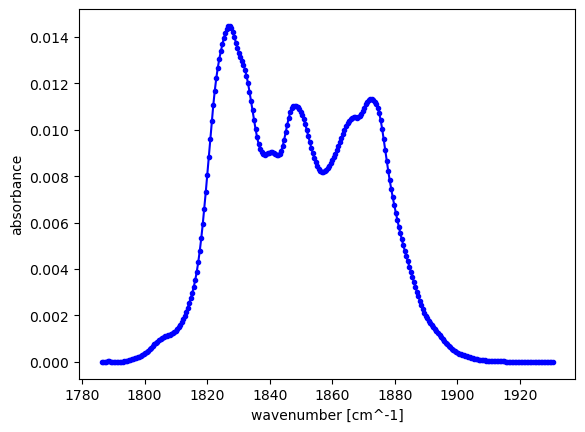

In [8]:
x_peak = x_all[375:675]
y_peak2 = y_all[375:675]
y_peak = y_peak2-min(y_peak2)

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-b', marker='.')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance')

We will work with the x_peak and y_peak data in the following exercises.

## 2.1. Three Gaussians (10 points)

Use linear regression with the sum of squared errors (SSE) cost function to fit a basis set consisting of the sum of three gaussians to the spectrum (x_peak,y_peak).  

$N(x, \mu, \sigma) = \frac{1}{2\pi\sigma^2}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

For example:

$y_i = w_0 \exp\left(-\frac{(x_i-1780)^2}{2(25^2)}\right) + w_1 \exp\left(-\frac{(x_i-1850)^2}{2(25^2)}\right)+ w_2 \exp\left(-\frac{(x_i-1920)^2}{2(25^2)}\right)$

For the gaussian $\mu$ and $\sigma$ parameters choose reasonable values by using visual inspection. Plot your results along with the original data (for an example look at the numerical optimization lecture) and report the SSE from your fit.



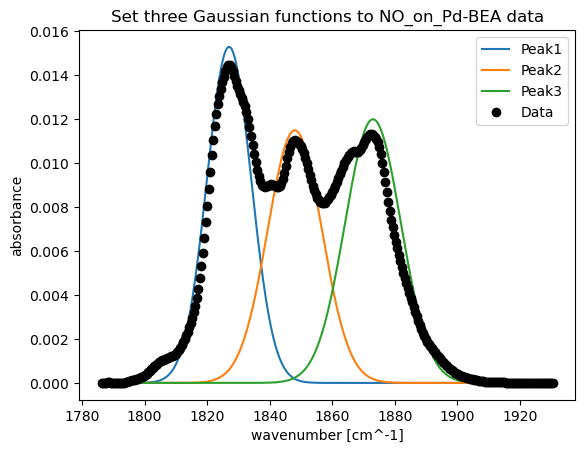

Weights from least-squares regression: [0.89063342 0.89226395 0.91389697]
SSE                                  : 8.736018234182938e-05


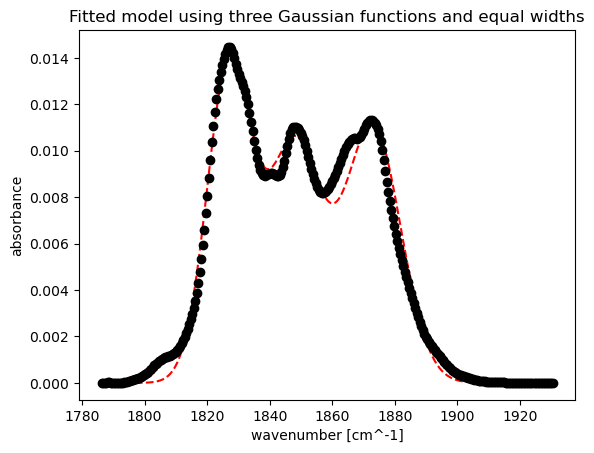

In [9]:
x_peak = x_peak.reshape(-1) #convert x_peak back into a vector
X_gauss = np.zeros((len(x_peak), 3))
X_gauss[:,0] = np.exp(-(x_peak - 1827)**2/(2*(7.07**2)))*0.0153
X_gauss[:,1] = np.exp(-(x_peak - 1848)**2/(2*(8.66**2)))*0.0115
X_gauss[:,2] = np.exp(-(x_peak - 1873)**2/(2*(8.93**2)))*0.012
# the numbers 1820, 1850 and 1875 comes from the visual inspection of data(black dots)
# and standard deviation (sigma) is related to the spread of the peak (Each one has a slightly different sigma, but it generally floats around 7 to 9...)
fig, ax = plt.subplots()
l1,=ax.plot(x_peak, X_gauss[:,0])
l2,=ax.plot(x_peak, X_gauss[:,1])
l3,=ax.plot(x_peak, X_gauss[:,2])
l4,=ax.plot(x_peak, y_peak, 'ok')
ax.set_title('Set three Gaussian functions to NO_on_Pd-BEA data')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance')
plt.legend([l1, l2, l3,l4],["Peak1", "Peak2", "Peak3","Data"])
plt.show()

A = X_gauss.T@X_gauss
b = X_gauss.T@y_peak
w_lsr = np.linalg.solve(A,b)
yhat = X_gauss@w_lsr
print('Weights from least-squares regression: {}'.format(w_lsr))
print('SSE                                  : {}'.format(sum((y_peak-yhat)**2)))
fig, ax = plt.subplots()
ax.plot(x_peak, yhat, '--r')
ax.plot(x_peak, y_peak, 'ok')
ax.set_title('Fitted model using three Gaussian functions and equal widths')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance')
plt.show()

## 2.2. Non-linear Regression (10 points)
Repeat 2.1 using non-linear regression to optimize the Gaussian $\mu$ and $\sigma$ parameters (6 Gaussian parameters total).  Plot your results along with the original data and report the SSE from your fit.

0.014546260477259704
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
Weights from non-linear regression   : [0.01389352 0.00987301 0.01091527]
Positions from non-linear regression : [1827.28090374 1848.66615506 1871.97780716]
Widths from non-linear regression    : [7.07852021 8.65703421 8.92770489]
SSE                                  : 4.8852585358905864e-05


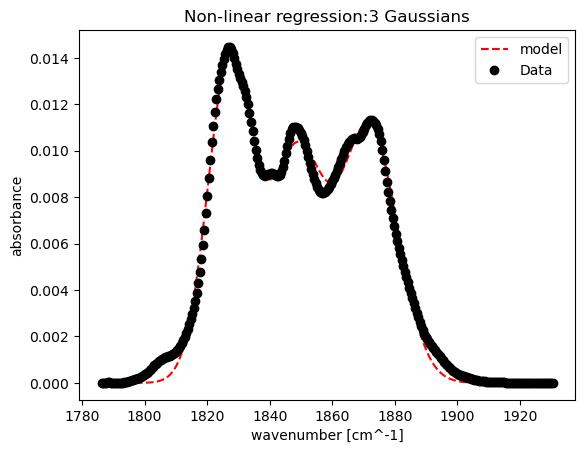

In [10]:
import numpy as np

def gaussian_loss(lamda, x, y, m=2): 
    yhat = np.zeros(len(y))
    for i in range(m):
        w_i = lamda[i]
        mu_i = lamda[m+i]
        sigma_i = lamda[2*m+i]
        yhat = yhat + w_i*np.exp(-(x - mu_i)**2/(2*sigma_i**2))  
    squared_error = (y - yhat)**2
    return np.sum(squared_error)

def combine_gaussians(lamda,x,y,m=2):  
    yhat = np.zeros(len(y))
    for i in range(m):
        w_i = lamda[i]
        mu_i = lamda[m+i]
        sigma_i = lamda[2*m+i]
        yhat = yhat + w_i*np.exp(-(x - mu_i)**2/(2*sigma_i**2))
    return yhat

import autograd.numpy as np   
from autograd import grad   
def g(lamda, x=x_peak, y=y_peak, m=3):
    return gaussian_loss(lamda, x, y, m)
diff_g = grad(g) 

lamda=lamda=np.ones(9)

print(g(lamda))
print(diff_g(lamda))


lamda=np.array([0.0153,0.0115,0.012,1827,1848,1873,8,8,8])  # 3 Height Parameters, 6 Gaussian parameters from visual inspection!
from scipy.optimize import minimize
result = minimize(g, lamda, method='BFGS')
result
a=combine_gaussians(result.x,x_peak,y_peak,3) 
plt.plot(x_peak,a,'--r',label='model')        
plt.plot(x_peak,y_peak,'ok',label='Data')
plt.title('Non-linear regression:3 Gaussians')
plt.legend()
print('Weights from non-linear regression   : {}'.format(np.array(result.x[0:3])))
print('Positions from non-linear regression : {}'.format(np.array(result.x[3:6])))
print('Widths from non-linear regression    : {}'.format(np.array(result.x[6:9])))
print('SSE                                  : {}'.format(result.fun))
plt.xlabel('wavenumber [cm^-1]')
plt.ylabel('absorbance')
plt.show()

## 2.3. Lorentzian Functions (5 points)

Repeat 2.2 for the Lorentz distribution:

$L(x,\Gamma,x_0)=\frac{1}{\pi}\frac{0.5\Gamma}{(x-x_0)^2+(0.5\Gamma)^2}$

where $\Gamma$ and $x_0$ are parameters that need to be optimized.  Use three Lorentzians.  Plot your solution along with the original data and report the SSE.

0.014542915789874709
[-1.11477257e-06 -1.11477257e-06 -1.11477257e-06 -1.20679416e-09
 -1.20679416e-09 -1.20679416e-09 -1.11476996e-06 -1.11476996e-06
 -1.11476996e-06]
Weights from non-linear regression   : [0.14231534 0.12908284 0.14415882]
Positions from non-linear regression : [1827.45390122 1848.435483   1871.20622994]
Widths from non-linear regression    : [3.3739132  4.982663   4.45126873]
SSE                                  : 0.0001567035347406045


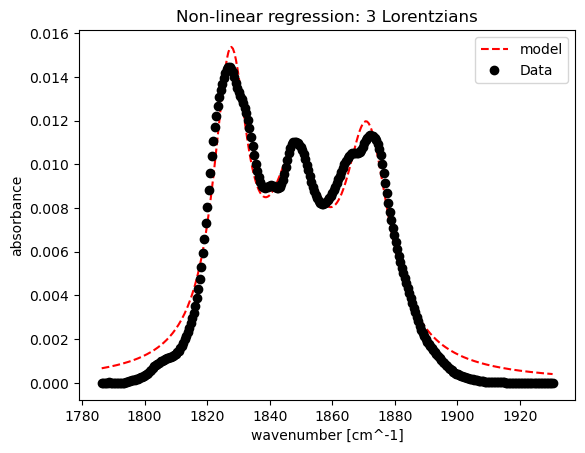

In [12]:
import numpy as np

def lorentzian_loss(lamda, x, y, m=2): 
    yhat = np.zeros(len(y))
    for i in range(m):
        w_i = lamda[i]
        x0_i = lamda[m+i]
        gamma_i = lamda[2*m+i]
        yhat = yhat + w_i / (np.pi * gamma_i * (1 + ((x - x0_i) / gamma_i * 0.5)**2))  
    squared_error = (y - yhat)**2
    return np.sum(squared_error)

def combine_lorentzians(lamda,x,y,m=2):  
    yhat = np.zeros(len(y))
    for i in range(m):
        w_i = lamda[i]
        x0_i = lamda[m+i]
        gamma_i = lamda[2*m+i]
        yhat = yhat + w_i / (np.pi * gamma_i * (1 + ((x - x0_i) / gamma_i * 0.5)**2))
    return yhat

import autograd.numpy as np   
from autograd import grad   
def g(lamda, x=x_peak, y=y_peak, m=3):
    return lorentzian_loss(lamda, x, y, m)
diff_g = grad(g) 

lamda=lamda=np.ones(9)

print(g(lamda))
print(diff_g(lamda))

lamda=np.array([0.0153,0.0115,0.012,1827,1848,1873,8,8,8])  # 3 Height Parameters, 6 Lorentzian parameters from visual inspection!
from  scipy.optimize import minimize
result = minimize(g, lamda, method='BFGS')
result
a=combine_lorentzians(result.x,x_peak,y_peak,3) 
plt.plot(x_peak,a,'--r',label='model')        
plt.plot(x_peak,y_peak,'ok',label='Data')
plt.title('Non-linear regression: 3 Lorentzians')
plt.legend()
print('Weights from non-linear regression   : {}'.format(np.array(result.x[0:3])))
print('Positions from non-linear regression : {}'.format(np.array(result.x[3:6])))
print('Widths from non-linear regression    : {}'.format(np.array(result.x[6:9])))
print('SSE                                  : {}'.format(result.fun))
plt.xlabel('wavenumber [cm^-1]')
plt.ylabel('absorbance')
plt.show()

## 2.4. Absolute Error Cost Function (10 points)
An alternative to SSE is the absolute error cost function, defined as:
$g_{\text{abs}} = \sum_j |\epsilon_j|$

Repeat 2.1 (so using linear regression and the same values you chose for the Gaussian means and standard deviations) using $g_{\text{abs}}$.  Plot your solution along with the original data and compute the SSE for it (yes, SSE even though we didn't use it as our cost function).  

Compare the SSE from this problem to the one you obtained in 2.1.

Weights from non-linear regression   : [0.01389458 0.00959239 0.01100397]
Positions from non-linear regression : [1826.78996485 1846.53385807 1870.81888198]
Widths from non-linear regression    : [6.58624316 8.33803401 9.98800534]
MAE                                  : 0.00026889362183864923


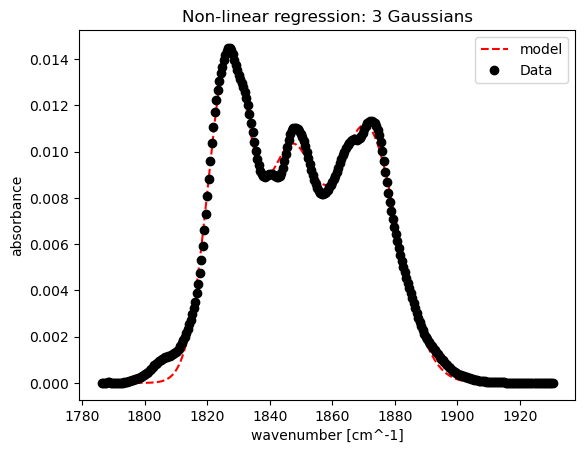

In [13]:
import numpy as np

def gaussian_mae(lamda, x, y, m=2): 
    yhat = np.zeros(len(y))
    for i in range(m):
        w_i = lamda[i]
        mu_i = lamda[m+i]
        sigma_i = lamda[2*m+i]
        yhat = yhat + w_i*np.exp(-(x - mu_i)**2/(2*sigma_i**2))  
    absolute_error = np.abs(y - yhat)
    return np.sum(absolute_error) / len(y)

def combine_gaussians(lamda,x,y,m=2):  
    yhat = np.zeros(len(y))
    for i in range(m):
        w_i = lamda[i]
        mu_i = lamda[m+i]
        sigma_i = lamda[2*m+i]
        yhat = yhat + w_i*np.exp(-(x - mu_i)**2/(2*sigma_i**2))
    return yhat

import autograd.numpy as np   
from autograd import grad   
def g(lamda, x=x_peak, y=y_peak, m=3):
    return gaussian_mae(lamda, x, y, m)
diff_g = grad(g) 

lamda=lamda=np.ones(9)

lamda=np.array([0.0153,0.0115,0.012,1827,1848,1873,8,8,8])  # 3 Height Parameters, 6 Gaussian parameters from visual inspection!
from  scipy.optimize  import minimize
result = minimize(g, lamda, method='BFGS')
a=combine_gaussians(result.x,x_peak,y_peak,3) 
plt.plot(x_peak,a,'--r',label='model')        
plt.plot(x_peak,y_peak,'ok',label='Data')
plt.title('Non-linear regression: 3 Gaussians')
plt.legend()
print('Weights from non-linear regression   : {}'.format(np.array(result.x[0:3])))
print('Positions from non-linear regression : {}'.format(np.array(result.x[3:6])))
print('Widths from non-linear regression    : {}'.format(np.array(result.x[6:9])))
print('MAE                                  : {}'.format(result.fun))
plt.xlabel('wavenumber [cm^-1]')
plt.ylabel('absorbance')
plt.show()


# 3.  $NO_x$ Adsorption Part II (25 points)

For these problems we will return back to using the SSE cost function.  Feel free to use the scikitlearn implementations for all models where applicable.  

## 3.1. Multi-Gaussian Linear Regression (10 points)

Fit the spectral data using linear regression and 30 equally spaced Gaussians.  Use the same value of $\sigma$ for all Gaussians, you should make your choice based on a visual comparison like we did in the lecture. Plot your solution along with the original data and report the SSE.

SSE                                  : 8.736018234182938e-05


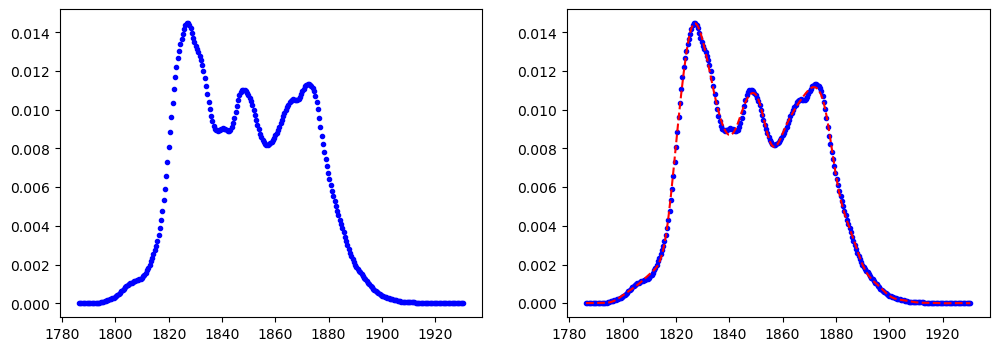

In [14]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def BIC(y, yhat, k):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + k*np.log(n)
    return B

def gaussian_features(x, N , sigma = 3.2):
    # x is a vector
    # sigma is the standard deviation
    xk_vec = np.linspace(min(x_peak), max(x_peak), N)
    features = []
    for xk in xk_vec:
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

N = 30
X_gauss = gaussian_features(x_peak, N)

LR_gauss = LinearRegression() #create a linear regression model instance
LR_gauss.fit(X_gauss, y_peak) #fit the model
yhat_gauss = LR_gauss.predict(X_gauss)

BIC_gauss = BIC(y_peak, yhat_gauss, N)

fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].plot(x_peak, y_peak, '.b')
axes[1].plot(x_peak, y_peak, '.b')
axes[1].plot(x_peak, yhat_gauss, '--r');
print('SSE                                  : {}'.format(sum((y_peak-yhat)**2)))


## 3.2. Bayesian Information Criterion (BIC) (5 points)

Use the BIC to determine the optimal number of gaussians.  For the optimal number of Gaussians plot your solution along with the original data and report the SSE.

SSE: 8.736018234182938e-05


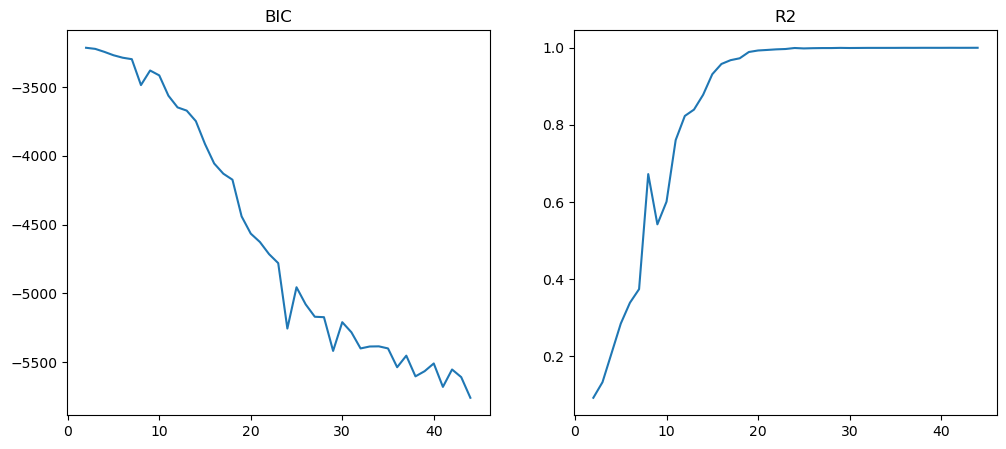

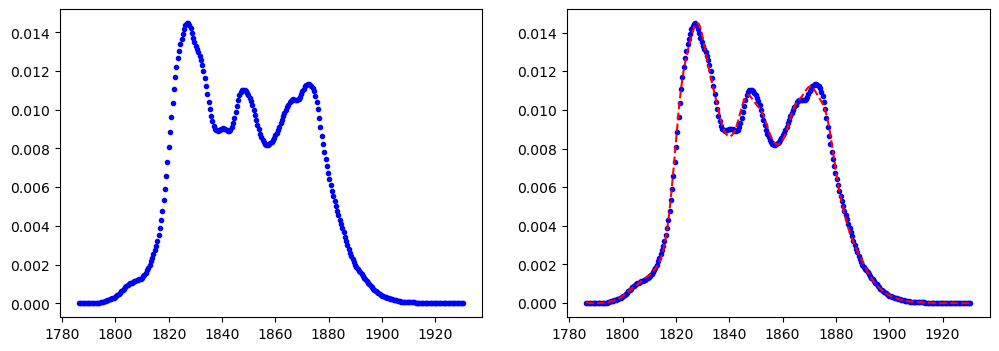

In [15]:
BICs = []
R2s = []
for N in range(2,45):
    X_gauss = gaussian_features(x_peak, N)
    LR_gauss = LinearRegression() #create a linear regression model instance
    LR_gauss.fit(X_gauss, y_peak) #fit the model
    yhat_gauss = LR_gauss.predict(X_gauss)

    BIC_gauss = BIC(y_peak, yhat_gauss, N)
    BICs.append(BIC_gauss)
    R2s.append(LR_gauss.score(X_gauss, y_peak))
    
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(range(2,45), BICs)
axes[0].set_title('BIC')
axes[1].plot(range(2,45), R2s)
axes[1].set_title('R2')


N = 25
X_gauss = gaussian_features(x_peak, N)

LR_gauss = LinearRegression() #create a linear regression model instance
LR_gauss.fit(X_gauss, y_peak) #fit the model
yhat_gauss = LR_gauss.predict(X_gauss)

BIC_gauss = BIC(y_peak, yhat_gauss, N)

fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].plot(x_peak, y_peak, '.b')
axes[1].plot(x_peak, y_peak, '.b')
axes[1].plot(x_peak, yhat_gauss, '--r');
print('SSE: {}'.format(sum((y_peak-yhat)**2)))

## 3.3. LASSO Regularization (10 points)

Use LASSO with your 30 equally spaced Gaussian basis functions and `GridSearchCV` with 5-fold cross validation to determine the optimal value of $\alpha$. Plot your solution along with the original data and report the SSE from predicting on the entire data set.

How many coefficients are non-zero?

KernelRidge(alpha=0.1, gamma=0.005, kernel='rbf') -1.9462881179370684
Total number of non-zero parameters: 300
SSE: 6.686601353219343e-08


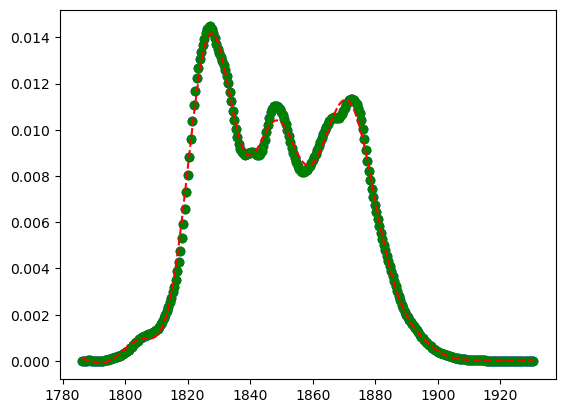

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

sigmas = np.array([5, 10, 15, 20, 25, 30,35, 40])
gammas = 1./(2*sigmas**2)

alphas = np.array([1e-9, 1e-5, 1e-4,1e-3, 1e-2,1e-1, 1])

parameter_ranges = {'alpha':alphas, 'gamma':gammas}

KRR = KernelRidge(alpha=alphas, kernel='rbf', gamma=gammas)

KRR_search = GridSearchCV(KRR, parameter_ranges, cv=5) #Grid Search CV with 5 cross-validations to find the best alpha
KRR_search.fit(x_peak.reshape(-1, 1),y_peak.reshape(-1, 1))
print(KRR_search.best_estimator_, KRR_search.best_score_)

yhat_KRR = KRR_search.best_estimator_.predict(x_peak.reshape(-1, 1))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'ob')
ax.plot(x_peak, y_peak, 'og')
ax.plot(x_peak, yhat_KRR, '--r', markerfacecolor='none');

coeffs = KRR_search.best_estimator_.dual_coef_
nonzero = [f for f in np.isclose(coeffs,0) if f == False]
print('Total number of non-zero parameters: {}'.format(len(nonzero)))

print('SSE: {}'.format(mean_squared_error(y_peak, yhat_KRR)))

# 4. Predicting Pollution (50 points)

NO$_x$ that cannot be trapped and/or catalytically converted is released to the atmosphere.  The following data reports pollutant concentrations in Milan (Italy) collected over a period of about one year.  Concentrations of each pollutant were detected with two different methods:

1) An expensive detector that requires constant monitoring from an employee, but reports the atmospheric concentration of the pollutant with high precision ("true" values).

2) A series of dirt cheap metal-oxides that adsorb pollutants and the concentration of the adsorbent on the oxide can be easily measured.

You were informed that early comparisons between NO$_x$ stored on the absorber to NO$_x$ detected in the atmosphere do not appear promising.  The company that makes the absorbers has hired you to develop a model that relates measurements from the absorbers to the atmospheric NO$_x$ concentration with a 5-fold cross-validation $R^2>0.90$.

Let's load the data

In [17]:
import pandas as pd
df = pd.read_excel('pollution_sensors.xlsx')
naming_dict = {'CO(GT)':'true_CO', 
               'PT08.S1(CO)':'SnOx_CO', 
               'NMHC(GT)':'true_hydrocarbon', 
               'C6H6(GT)':'true_benzene',
               'PT08.S2(NMHC)':'TiOx_hydrocarbon',
               'NOx(GT)':'true_NOx',
               'PT08.S3(NOx)':'WOx_NOx',
               'NO2(GT)':'true_NO2',
               'PT08.S4(NO2)':'WOx_NO2',
               'PT08.S5(O3)':'InOx_O3',
               'RH':'relative_humidity',
               'AH':'absolute_humidity'
              }
df = df.rename(columns=naming_dict)

df.head(10)

,Date,Time,true_CO,SnOx_CO,true_hydrocarbon,true_benzene,TiOx_hydrocarbon,true_NOx,WOx_NOx,true_NO2,WOx_NO2,InOx_O3,T,relative_humidity,absolute_humidity
0,2004-03-10,0.750000,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,0.791667,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,0.833333,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,0.875000,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,0.916667,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,0.958333,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,0.000000,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,0.041667,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,0.083333,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,0.125000,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


To start with we will use the adsorbed NO$_x$ ('WOx_NOx') as our only feature, and the atmospheric concentration of NO$_x$ ('true_NOx') as our target.  I will remove rows with missing data entries for you.

There are 7396 valid points
(7396, 1) (7396, 1)


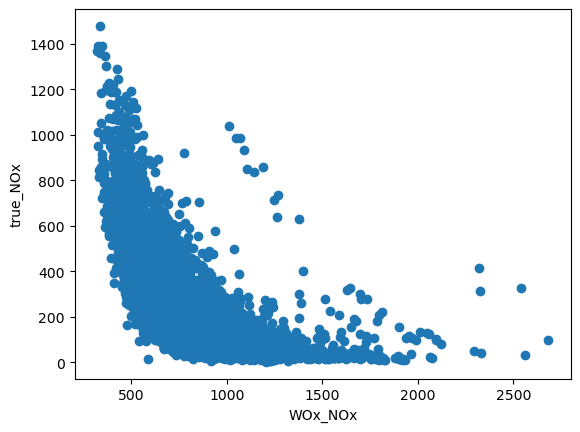

In [16]:
import numpy as np
x = df['WOx_NOx'].values
y = df['true_NOx'].values
valids = np.logical_and(y>0, x>0)
x = x[valids]
y = y[valids]
print('There are {} valid points'.format(len(x)))

import numpy as np
y=y.reshape(-1,1)
x=x.reshape(-1,1)
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
x,y=unison_shuffled_copies(x, y)

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('WOx_NOx')
ax.set_ylabel('true_NOx')
print(x.shape, y.shape)

As you can see from the plot we have our work cut out for us here...

## 4.1. Baseline Model (Bad) (5 points)

Use linear regression to create a baseline model for the data (use all of the data, do not split into test and train). Use WOx_NOx as the feature and true_NOx as the target.  Make a parity plot from your result and report your $R^2$.  

R^2 score: 0.43


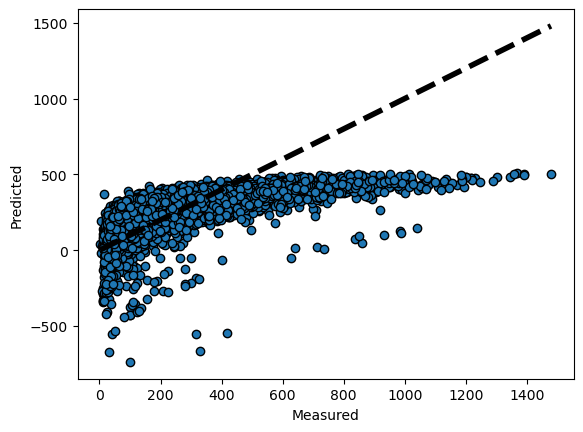

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x.reshape(-1,1), y.reshape(-1,1))
score = reg.score(x.reshape(-1,1), y.reshape(-1,1),)
predicted = reg.predict(x)
print(f'R^2 score: {score:.2f}')

# Plot the Parity Plot!
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


## 4.2. Kernel Ridge Regression (Still Bad) (10 points)

Downsample the data, taking every 10th data point.  Train a Kernel Ridge Regression (KRR) model using an rbf kernel. Use `GridSearchCV` with 5-fold cross validation to optimize the values of $\alpha$ and $\gamma$.  

$\textit{Hint:}$ If your notebook is taking many minutes to train the model, interrupt the kernel and change your parameter ranges.  

Make a parity plot for your solution and report the $R^2$ value.

R^2 value: 0.739


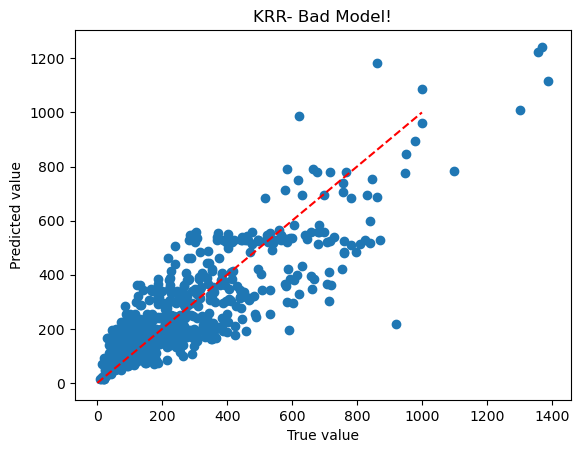

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

x = x[::10] #every 10 points
y = y[::10] #every 10 points

param_grid = {"alpha": [1e-3, 1e-2, 1e-1, 1, 10], "gamma": [1e-3, 1e-2, 1e-1, 1, 10]}
krr = KernelRidge(kernel="rbf")
grid = GridSearchCV(krr, param_grid, cv=5) # 5-fold validation
grid.fit(x,y)

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

y_pred = grid.predict(x)

r2 = r2_score(y, y_pred)
print(f"R^2 value: {r2:.3f}")

plt.scatter(y, y_pred)
plt.plot([0, 1000], [0, 1000], "r--")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("KRR- Bad Model!")
plt.show()

## 4.3 Features and Covariance (TBD) (5 points)

We cannot use any of the "true" values as features since they would require use of the expensive detector.  However, we can use information from the other metal-oxides and data such as temperature and humidity.  Let's add in these features:

In [19]:
names =['SnOx_CO', 'TiOx_hydrocarbon', 'WOx_NOx', 'WOx_NO2','InOx_O3', 'T', 'relative_humidity'] 
X = df[names]
y = df['true_NOx']
X = X.values
y = y.values
valid_X = (X > 0).min(axis=1) #<- if any are false, this will be false
valids = np.logical_and(valid_X, y > 0)
valids = np.logical_and(valids, np.isfinite(X).all(axis=1)) #<- this removes inf and nan
X = X[valids, :]
y = y[valids]
x,y=unison_shuffled_copies(X, y)
print(x.shape, y.shape)

(7383, 7) (7383,)


Use standard rescaling to rescale your features.  Plot the covariance matrix for the rescaled features.

Minimum: 0.22500000521541, Maximum: 2775.0
Minimum scaled: -2.4165190760651933, Maximum scaled: 7.259404331294158
(7383, 7)
Minimum: 2.0, Maximum: 1479.0
Minimum scaled: -1.1645636253797567, Maximum scaled: 5.992946830511698
(7383,)


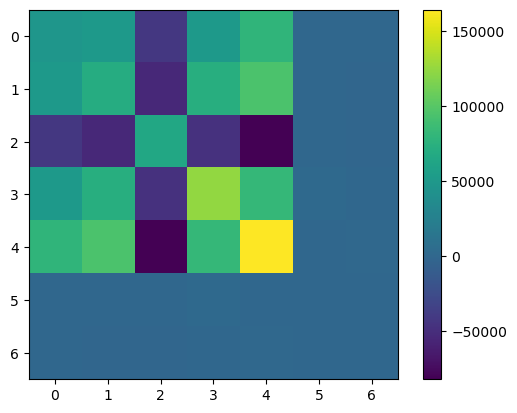

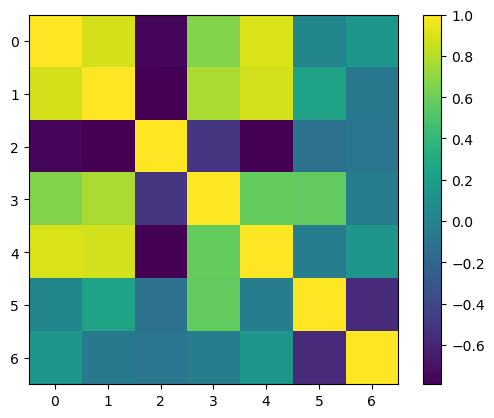

In [20]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)  #axis=0 tells Python to work along the columns
print("Minimum: {}, Maximum: {}".format(X.min(), X.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_scaled.min(), X_scaled.max()))

covar = np.cov(X.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);
print(X_scaled.shape)

covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);
corr =  np.cov(X_scaled.T)

Y_scaled = (y - y.mean(axis=0))/y.std(axis=0)  #axis=0 tells Python to work along the columns
print("Minimum: {}, Maximum: {}".format(y.min(), y.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(Y_scaled.min(), Y_scaled.max()))
print(Y_scaled.shape)

## 4.4. New Baseline Model (Getting There...) (5 points)

Use linear regression to create a baseline model for the data that now includes 7 features (use all of the data, do not split into test and train).  Make a parity plot from your result and report your $R^2$.  

(7383, 7)
R^2 score: 0.84


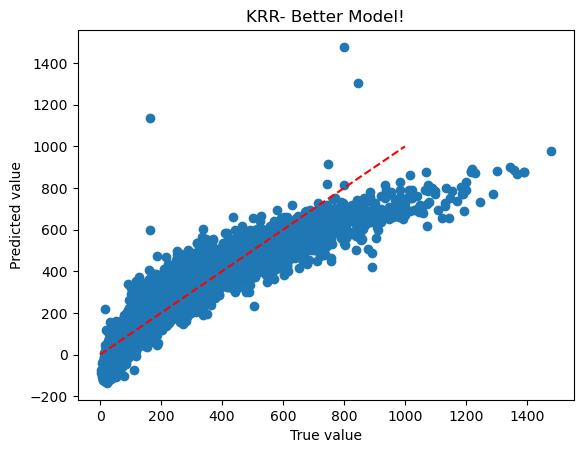

In [21]:
from sklearn.linear_model import LinearRegression
print(x.shape)
rega= LinearRegression()
rega.fit(x, y)
score = rega.score(x, y)
predicted = rega.predict(x)
print(f'R^2 score: {score:.2f}')

plt.scatter(y, predicted)
plt.plot([0, 1000], [0, 1000], "r--")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("KRR- Better Model!")
plt.show()

## 4.5. KRR Take Two (Good) (10 points)

Downsample the data, taking every 10th data point.  Train a Kernel Ridge Regression (KRR) model using an rbf kernel. Use `GridSearchCV` with 5-fold cross validation to optimize the values of $\alpha$ and $\gamma$.  

$\textit{Hint:}$ If your notebook is taking many minutes to train the model, interrupt the kernel and change your parameter ranges.  

Make a parity plot for your solution and report the $R^2$ value.

R^2 value: 1.000


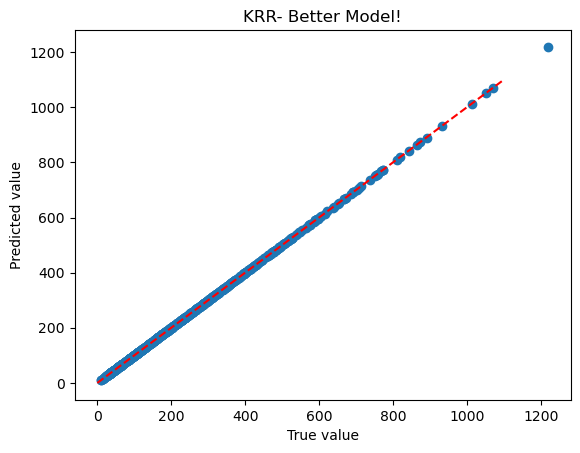

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

x = x[::10] #every 10 points
y = y[::10] #every 10 points

param_grid = {"alpha": [1e-3, 1e-2, 1e-1, 1, 10], "gamma": [1e-3, 1e-2, 1e-1, 1, 10]}
krr = KernelRidge(kernel="rbf")# rbf
grid = GridSearchCV(krr, param_grid, cv=5) # 5-fold validation
grid.fit(x,y)

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

y_pred = grid.predict(x)

r2 = r2_score(y, y_pred)
print(f"R^2 value: {r2:.3f}")

plt.scatter(y, y_pred)
plt.plot([0, 1100], [0, 1100], "r--")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("KRR- Better Model!")
plt.show()

## 4.6. Feature Analysis (5 points)

Using Principle Component Analysis (PCA) report how many features you need to explain 95% of the variance in the feature data.

Using the PCA report, we can see that 95% of the variance comes from 4 features! ('true_CO', 'Time', 'true_benzene', 'SnOx_CO'), allowing us to see that these features, when added together, make up around 95% of the variance of the data. 

In [23]:
from sklearn.decomposition import PCA #sklearn's inbuilt PCA
pca = PCA() 
pca.fit(X_scaled)
print(pca.explained_variance_ratio_) 
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
cols= numeric_map.columns # do not use df.columns as we already skipped some features like Date
abs_weights=np.abs(pca.components_[0,:]) 
sorted_indices= np.argsort(abs_weights) # sort in ascending order,less important (close to zero) values comes first
most_important=list(cols[sorted_indices[-5:]]) # here the most important feature comes at the end
most_important.reverse() # reverse the order so that the most important feature comes first
print('most important',most_important)
print("Summed Contributory Variance of Top 4 most important components: 0.96754949")

[0.5839489  0.24880573 0.08999292 0.04480194 0.01349728 0.01322527
 0.00572796]
most important ['true_CO', 'Time', 'true_benzene', 'SnOx_CO', 'true_hydrocarbon']
Summed Contributory Variance of Top 4 most important components: 0.96754949


## 4.7. Feature Reduction (10 points)

Using the PCA features (PCA_projection in the example in the lecture), report the minimum number of PCA features in order to achieve an $R^2$ > 0.9 using KRR with a rbf kernel and `GridSearchCV` with 5-fold cross validation to optimize the values of $\alpha$ and $\gamma$.

Make sure you are using your downsampled data (every 10th data point) for this or your model will take a very long time to train.

There are 7396 valid points
(7396, 1) (7396, 1)


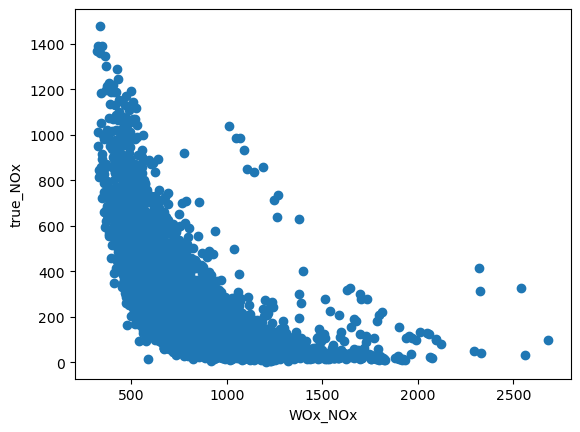

In [24]:
import numpy as np
x = df['WOx_NOx'].values
y = df['true_NOx'].values
valids = np.logical_and(y>0, x>0)
x = x[valids]
y = y[valids]
print('There are {} valid points'.format(len(x)))

import numpy as np
y=y.reshape(-1,1)
x=x.reshape(-1,1)
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
x,y=unison_shuffled_copies(x, y)

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('WOx_NOx')
ax.set_ylabel('true_NOx')
print(x.shape, y.shape)

x = x[::10] #every 10 points
y = y[::10] #every 10 points

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def min_pca_features(X, y):
  X = (X - X.mean()) / X.std()
  min_features = X.shape[1] 
  best_r2 = 0 # Best R^2 score achieved
  best_model = None # Best model found
  for n_components in range(1, X.shape[1] + 15):
    kpca = KernelPCA(n_components=n_components, kernel='rbf', fit_inverse_transform=True)
    X_pca = kpca.fit_transform(X)
    parameters = {'alpha': [0.005, 0.0055, 0.0058, 0.008, 0.009], 'gamma': [0.004, 0.0041, 0.0042, 0.0043, 0.0044]}
    krr = KernelRidge(kernel='rbf')
    grid_search = GridSearchCV(krr, parameters, cv=5, scoring='r2')
    grid_search.fit(X_pca, y)
    model = grid_search.best_estimator_
    r2 = grid_search.best_score_
    print(f'Number of PCA features: {n_components}')
    print(f'Best model: {model}')
    print(f'Best R^2 score: {r2}')
    print('-' * 40)
    if r2 > best_r2:
      min_features = n_components
      best_r2 = r2
      best_model = model
      if r2 >= 0.9:
        pass
  return min_features, best_model


min_pca_features(x, y)

Number of PCA features: 1
Best model: KernelRidge(alpha=0.005, gamma=0.0044, kernel='rbf')
Best R^2 score: 0.39291319722394863
----------------------------------------
Number of PCA features: 2
Best model: KernelRidge(alpha=0.005, gamma=0.0044, kernel='rbf')
Best R^2 score: 0.4829997755568359
----------------------------------------
Number of PCA features: 3
Best model: KernelRidge(alpha=0.005, gamma=0.0044, kernel='rbf')
Best R^2 score: 0.606739898111471
----------------------------------------
Number of PCA features: 4
Best model: KernelRidge(alpha=0.005, gamma=0.0044, kernel='rbf')
Best R^2 score: 0.6224062503351354
----------------------------------------
Number of PCA features: 5
Best model: KernelRidge(alpha=0.005, gamma=0.0044, kernel='rbf')
Best R^2 score: 0.6498565457765995
----------------------------------------
Number of PCA features: 6
Best model: KernelRidge(alpha=0.005, gamma=0.0044, kernel='rbf')
Best R^2 score: 0.6524734589517884
---------------------------------------

(11, KernelRidge(alpha=0.005, gamma=0.0044, kernel='rbf'))

# 5. Classifying NO$_x$ Pollution Cycles (25 points)

Impressed with your ability to predict NO$_x$ levels, your employer has now tasked you with predicting when the atmospheric concentration of NO$_x$ rises above 200, which may be harmful to some individuals, based upon the time and day.  Below, I have converted the dates and times to numeric values for you.

The data starts March 10th (Date=0 is March 10th), and is collected every hour (Time=0 is 6PM).

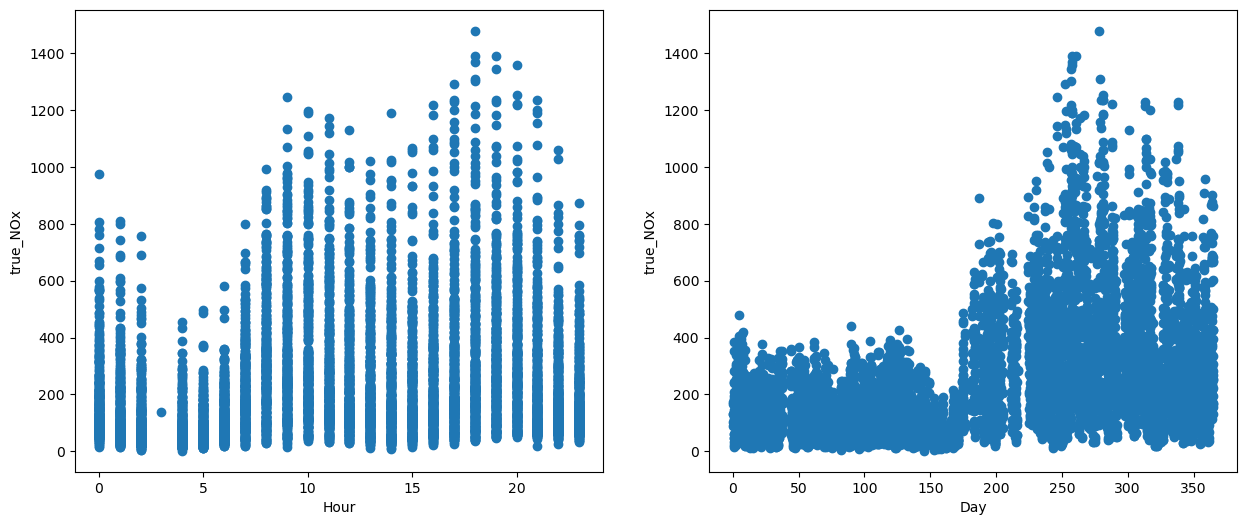

In [39]:
import numpy as np
x_time = df['Time'].values*24
y = df['true_NOx'].values
timedata=pd.to_datetime(df['Date']).astype('int64')
x_date=(timedata-min(timedata))/86400000000000
valids = np.logical_and(y>0, x_date<366)
x_time = x_time[valids]
x_date = x_date[valids]
y = y[valids]
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(x_time,y)
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('true_NOx')

axes[1].scatter(x_date,y)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('true_NOx')
x=np.vstack((x_time,x_date))
x=np.transpose(x)

We are going to change this into a binary classification problem by assigning NO$_x$ values over 200 one class (-1), and those below the other class (1).

(7120, 2) (7120,)


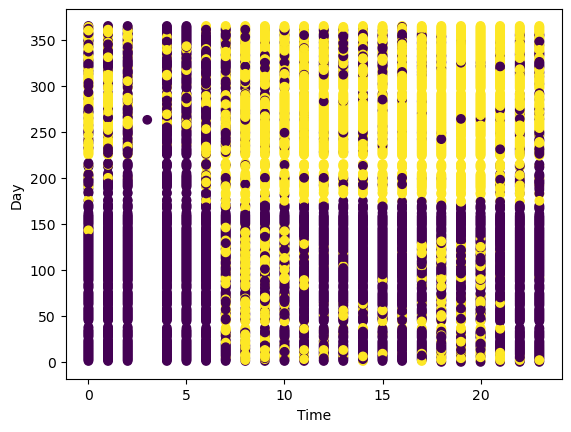

In [26]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)                  
    p = np.random.permutation(len(a))     
    return a[p], b[p]                       

y_filtered=y[y>200]
x_filtered=x[y>200]
y_filtered2=y[y<200]
x_filtered2=x[y<200]

z1=np.ones(len(y_filtered))
z2=np.ones(len(y_filtered2))-2
x_total=np.vstack((x_filtered,x_filtered2))
z_total=np.append(z1,z2)
x_total, z_total = unison_shuffled_copies(x_total, z_total)

fig, ax = plt.subplots()
ax.scatter(x_total[:,0],x_total[:,1],c=z_total)
ax.set_xlabel('Time')
ax.set_ylabel('Day')
print(x_total.shape,z_total.shape)


Here, x_total is the feature matrix, and z_total is the class vector.

## 5.1.   Support Vector NO$_x$ Machines (10 points)

First, rescale your features using the standard rescaling.

Downsample the data taking every 10th data point. 

Use a support vector machine classifier (use scikitlearn for this), with a rbf kernel, and use `GridSearchCV` with 5-fold cross validation to optimize $\alpha$ and $\gamma$.  

Report the accuracy, precision and recall for your model on the entire data set (not downsampled, so 7120 data points).

In [27]:
def acc_prec_recall(y_model, y_actual):
    TP = np.sum(np.logical_and(y_model == y_actual, y_model == 1))
    TN = np.sum(np.logical_and(y_model == y_actual, y_model == -1))
    FP = np.sum(np.logical_and(y_model != y_actual, y_model == 1))
    FN = np.sum(np.logical_and(y_model != y_actual, y_model == -1))
    acc = (TP + TN) / (TP + TN + FP + FN)
    if TP == 0:
        prec = 0
        recall = 0
    else:
        prec = TP / (TP + FP)
        recall = TP / (TP + FN)
    return acc, prec, recall

Minimum: 0.0, Maximum: 365.0
Minimum scaled: -1.7392949390180192, Maximum scaled: 1.6304020913903885
(7120, 2)


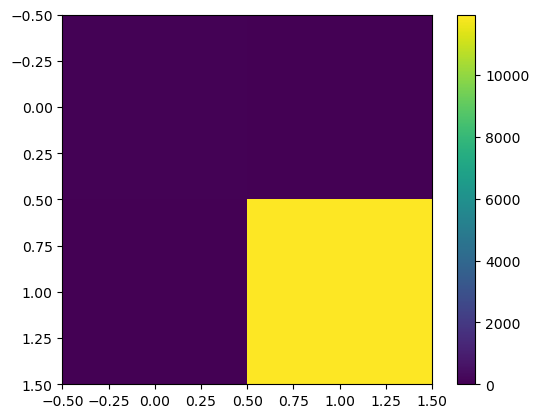

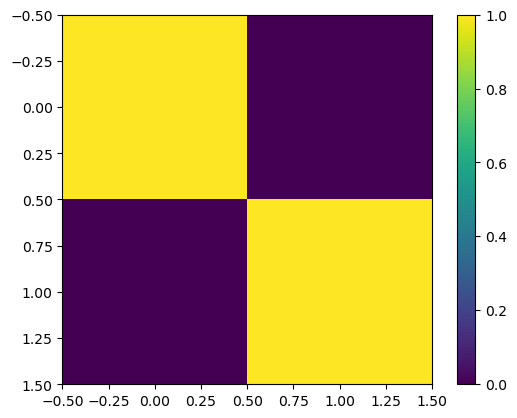

In [40]:
X_scaled = (x_total - x_total.mean(axis=0))/x_total.std(axis=0)  #axis=0 tells Python to work along the columns
print("Minimum: {}, Maximum: {}".format(x_total.min(), x_total.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_scaled.min(), X_scaled.max()))

covar = np.cov(x_total.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);
print(X_scaled.shape)

covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);
corr =  np.cov(X_scaled.T)

X_scaled = X_scaled[::10] #every 10 points
z_totala = z_total[::10] #every 10 points

In [34]:
print(X_scaled.shape)
print(z_totala.shape)

(712, 2)
(712,)


In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, z_totala, test_size=0.25)

sigmas = np.array([0.001, 0.1, 1, 10, 100])
gammas = 1./(2*sigmas**2)

alphas = np.array([1e-9, 1e-5, 1e-4,1e-3, 1e-2,1e-1, 1])
Cs = 1/alphas

parameter_ranges = {'C':Cs, 'gamma':gammas}

svc = SVC(kernel='rbf')

svc_search = GridSearchCV(svc, parameter_ranges, cv=5)
svc_search.fit(X_train,y_train)

ypred = svc_search.best_estimator_.predict(X_test)

ac, pr, re = acc_prec_recall(ypred,y_test)
print('C:')
print(svc_search.best_estimator_.C)
print('Gamma:')
print(svc_search.best_estimator_.gamma)
print('Accuracy:')
print(ac)
print('Precsion:')
print(pr)
print('Recall:')
print(re)

C:
10.0
Gamma:
0.5
Accuracy:
0.7777777777777778
Precsion:
0.8333333333333334
Recall:
0.8333333333333334


## 5.2. k-Nearest NO$_x$ Neighbors (10 points)

Use the entire 7120 data points to train a kNN model using the scikitlearn implementation `KNeighborsClassifier` and `GridSearchCV` to find the optimal value of $k$ using 5-fold cross-validation. 

Do not rescale your features for this model.

Report the accuracy, precision and recall for your model on the entire data set. 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x_total, z_total, test_size=0.2)

Ns = np.arange(1,60)

parameter_ranges = {'n_neighbors':Ns}

knn = KNeighborsClassifier()
knn_search = GridSearchCV(knn, parameter_ranges, cv=3)
knn_search.fit(X_train,y_train)

ypred = knn_search.best_estimator_.predict(X_test)

ac, pr, re = acc_prec_recall(ypred,y_test)
print('Number of neighbors:')
print(knn_search.best_estimator_.n_neighbors)
print('Accuracy:')
print(ac)
print('Precsion:')
print(pr)
print('Recall:')
print(re)

Number of neighbors:
3
Accuracy:
0.8855337078651685
Precsion:
0.875968992248062
Recall:
0.8719135802469136


## 5.3. Is it safe? (5 points)

Choose your best model to predict if the NO$_x$ concentration will be below 200 on April 17th at 5pm. (For the year the data is collected in)

According to our data, the NO$_x$ concentration will be above 200 on April 17th at 5pm! (As it is -1, meaning it is not safe!)

In [36]:
# The data starts March 10th (Date=0 is March 10th), and is collected every hour (Time=0 is 6PM).
new_point = [37, 23]
prediction = knn_search.predict([new_point])

# Print the prediction
print(prediction)

[-1.]


# 6. Project (5 points)

Please Fill out the following information about the project you intend to do: 

Project Goals: To make a machine-learning model that can predict the toxicity of a chemical compound, which is a somewhat active area of research: 

[1](https://pubs.acs.org/doi/10.1021/acs.jcim.1c00208), [2](https://www.frontiersin.org/articles/10.3389/fenvs.2015.00080/full), [3](https://www.frontiersin.org/articles/10.3389/fchem.2018.00030/full), [4](https://efsa.onlinelibrary.wiley.com/doi/full/10.2903/j.efsa.2019.e170710), [5](https://www.mdpi.com/2305-6304/10/11/706), and most of these methods use a neural network similar to what we described in class (with some exceptions like 5), relying on a k-fold cross-validated data set; and in our instance, we aim to make a neural network that can determine if a chemical could be cytotoxic based on its smiles data, using some of the databases that these papers also used (https://tox-new.charite.de/protox_II/index.php?site=links).

Datasets and where you will obtain them: 

We will use several cytotoxicity datasets such as: 
https://www.kaggle.com/competitions/the-toxicity-prediction-challenge/data, which is one of the easiest and comprehensive datasets available for the toxicity of chemicals; a series of datasets that allow us to determine if a chemical is toxic: https://toxric.bioinforai.tech/download, and the classic https://paperswithcode.com/dataset/tox21-1, which is the most widely used chemical toxicity dataset in the world, all of these sources are available to download at the links in the list!

Methods you wish to employ for the project: 

Logically, we should use a neural network, as every study tends to use a neural network (Multi-layer Perceptron (MLP) is the most common) for their predictions and training process, along with using sci-kit learn (althrough they recommend for larger scale networks to use this webpage: https://scikit-learn.org/stable/related_projects.html#related-projects), numpy, and pandas to work with the datasets, we will probably use all three of these with a slight change to sci-kit (https://scikit-neuralnetwork.readthedocs.io/en/latest/)! We can also use other methods of classification and discrimination like kNN, random forest, but I haven't found these in any of the papers I have read for this pre-project write-up. And we will probably use a deep learning neural network which is the most similar to paper 5 in the project goals section. 